In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gempy.utils.transformations import rescale_surface_points
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.datasets import make_blobs, make_gaussian_quantiles, make_classification
%matplotlib inline


/Users/andrew/anaconda3/envs/gempy3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


Let's take a data set already in gempy's source and see how anisotropic the range is

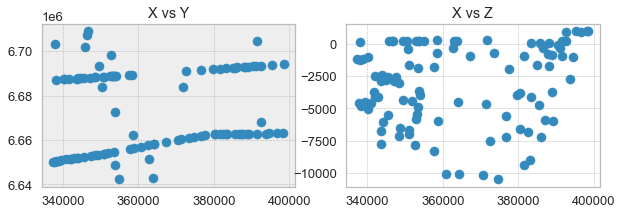

In [7]:
plt.style.use("fast")
data = pd.read_csv('../input_data/Paper_GU2F_sc_faults_topo_Points.csv')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.scatter(data['X'] ,data['Y'])
ax1.set_title('X vs Y')
ax2.scatter(data['X'], data['Z'])
ax2.set_title('X vs Z')
ax2.set_facecolor("white")

In [8]:
data[['X','Y','Z']].describe()

,X,Y,Z
count,103.000000,1.030000e+02,103.000000
mean,364050.048632,6.673085e+06,-3147.051406
std,19183.592454,1.813891e+04,3102.745047
min,337375.397545,6.642333e+06,-10480.336105
25%,347314.406821,6.657289e+06,-5463.783697
50%,358422.044112,6.662983e+06,-2703.767105
75%,383206.756183,6.688900e+06,-319.328401
max,398507.110115,6.709119e+06,986.956303


In [9]:
data.X.max() - data.X.min(), data.Y.max() - data.Y.min(), data.Z.max() - data.Z.min()

(61131.71257000003, 66786.0, 11467.292408000001)

let's see how the old gempy rescaling method moved this data
the old function was:  
new_coord_surface_points = (XYZ - centers) / rescaling_factor + offset

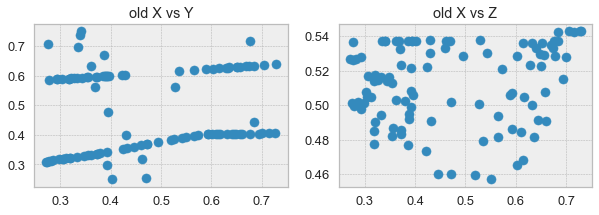

                X           Y           Z
count  103.000000  103.000000  103.000000
mean     0.470868    0.480228    0.511976
std      0.143620    0.135799    0.023229
min      0.271166    0.250000    0.457074
25%      0.345575    0.361970    0.494631
50%      0.428733    0.404598    0.515295
75%      0.614287    0.598632    0.533146
max      0.728834    0.750000    0.542926


In [10]:
# code from Rescaling class
max_coord = data.max()[['X', 'Y', 'Z']]
min_coord = data.min()[['X', 'Y', 'Z']]
rescaling_factor_val = (2 * np.max(max_coord - min_coord))
centers = ((max_coord + min_coord) / 2).astype(float).values

old_rescaled = rescale_surface_points(data[['X', 'Y', 'Z']], centers, rescaling_factor_val, offset=0.5)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.scatter(old_rescaled['X'],old_rescaled['Y'])
ax1.set_title('old X vs Y')
ax2.scatter(old_rescaled['X'],old_rescaled['Z'])
ax2.set_title('old X vs Z')
plt.show()
print(old_rescaled.describe())

so we can see that while the x and y range spans some of the full breadth of 0 1, all of the Z axis fits between 0.543 and 0.457 or so.
As I decrease the Z range this further compacts very tightly around 0.5
lets see if we can do better by multiplying the z axis differently

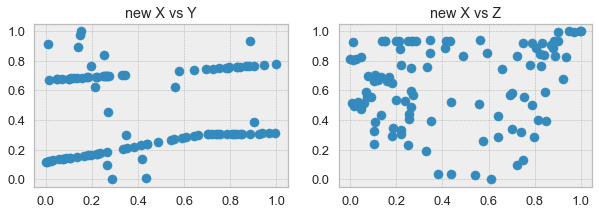

                X           Y           Z
count  103.000000  103.000000  103.000000
mean     0.436447    0.460555    0.639596
std      0.313808    0.271597    0.270573
min      0.000100    0.000100    0.000100
25%      0.162684    0.224040    0.437566
50%      0.344384    0.309296    0.678252
75%      0.749815    0.697364    0.886186
max      1.000100    1.000100    1.000100


In [68]:
new_rf = max_coord - min_coord

new_rescaled =  (data[['X', 'Y', 'Z']] - centers) / (new_rf*2) + 0.5001

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.scatter(new_rescaled['X'],new_rescaled['Y'])
ax1.set_title('new X vs Y')
ax2.scatter(new_rescaled['X'],new_rescaled['Z'])
ax2.set_title('new X vs Z')
plt.show()
print(new_rescaled.describe())

Just use min max scaler to ensure the data in all axes is between 0 and 1

,0,1,2
count,103.000000,103.000000,103.000000
mean,0.436347,0.460455,0.639496
std,0.313808,0.271597,0.270573
min,0.000000,0.000000,0.000000
25%,0.162584,0.223940,0.437466
50%,0.344284,0.309196,0.678152
75%,0.749715,0.697264,0.886086
max,1.000000,1.000000,1.000000


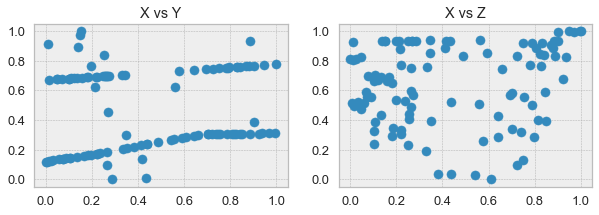

In [11]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['X', 'Y', 'Z']])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.scatter(scaled[:,0], scaled[:,1])
ax1.set_title('X vs Y')
ax2.scatter(scaled[:,0], scaled[:,2])
ax2.set_title('X vs Z')
pd.DataFrame(scaled).describe()

In [13]:
scaler.scale_

array([1.63581218e-05, 1.49731980e-05, 8.72045435e-05])

In [ ]:
scaler.

In [58]:
scaler.data_min_

array([ 3.37375398e+05,  6.64233300e+06, -1.04803361e+01])

In [59]:
scaler.data_range_

array([6.11317126e+04, 6.67860000e+04, 1.14672924e+01])

In [60]:
scaler.data_max_


array([3.98507110e+05, 6.70911900e+06, 9.86956303e-01])